# Object Detection(Car Detection)




### DOMAIN: 
Automotive , Surveillance
### CONTEXT: 
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is 
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of 
the car, type, colour, number plates etc
### DATA DESCRIPTION: 
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing 
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 
2012 Tesla Model S or 2012 BMW M3 coupe
‣ Train Images: Consists of real images of cars as per the make and year of the car. 
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project
Dataset: Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
### REFERENCE: 
3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE 
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
### PROJECT OBJECTIVE: 
Design a DL based car identification model

In [ ]:
%tensorflow_version 2.x
#%tensorflow_version 1.x

In [ ]:
# Lets check version of tensor flow and keras installed 

import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
import keras
print(keras.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


All the above versions libraries are required for the Third party implementation we are goin to use

## Legend

 ### Insights/inferences/results have been displayed post each step

In [ ]:
# Lets check if we are connected to GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


## 1.0 Basic Config & Settings

### 1.1 Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

#Additional libs
import matplotlib.patches as patches
from pathlib import Path
import matplotlib.image as img
import cv2



In [ ]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

### 1.2 Set Necessary variables

In [ ]:
# Read The Data Set


images_path = "/content/drive/MyDrive/Capstone/Car Images/Car Images/"

#Lets note here that our images are structred as folders.Each folder is a cart type
#Corresponding folder will contain images of THAT car  type
#We have a seperate folder for Train and Test IMages

In [ ]:
# Variables required for model Building

images_height=128
images_width=128

## 2.0 Prepare Data

In [ ]:
train_data_dir = Path('/content/drive/MyDrive/Capstone/Car Images/Car Images/Train Images')
test_data_dir = Path('/content/drive/MyDrive/Capstone/Car Images/Car Images/Test Images')

BATCH_SIZE = 32 
IMG_SIZE = 128

In [ ]:
import pandas as pd

#Lets read the Train Annotations

#Lets give our own column names as excel sheet does not have proper column names
columnNameList=['file_name','cor1','cor2','cor3','cor4','Image_Class']
trainAnno= pd.read_csv('/content/drive/MyDrive/Capstone/Annotations/Train Annotations.csv',names=columnNameList,header=0)
trainAnno.head(5)

,file_name,cor1,cor2,cor3,cor4,Image_Class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [ ]:
files = train_data_dir.rglob('*.jpg')
input=pd.DataFrame(files,columns =['a'])
input['a']=input['a'].astype(str)
df_train=input['a'].str.split('/',expand=True)
train=input.join(df_train)[['a',8]]
train.columns=('file_path','label')

In [ ]:
train.head()
len(train)

,file_path,label
0,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
1,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
2,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
3,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
4,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012


8144

In [ ]:
train.head()

,file_path,label
0,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
1,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
2,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
3,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012
4,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012


In [ ]:
train['file_name']=train['file_path'].apply(lambda getFileName:getFileName.split('/')[9])

In [ ]:
train.head()

,file_path,label,file_name
0,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,00482.jpg
1,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,05872.jpg
2,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,06576.jpg
3,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,00719.jpg
4,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,04655.jpg


In [ ]:
trainAnno.head()

,file_name,cor1,cor2,cor3,cor4,Image_Class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [ ]:
# Lets add coordinate information to the above table
trainDFOrig=pd.merge(train,trainAnno,on='file_name',how='inner')

In [ ]:
trainDFOrig.head()

,file_path,label,file_name,cor1,cor2,cor3,cor4,Image_Class
0,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,00482.jpg,80,91,589,429,184
1,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,05872.jpg,39,35,591,413,184
2,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,06576.jpg,64,347,629,577,184
3,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,00719.jpg,118,93,380,317,184
4,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,04655.jpg,9,11,824,489,184


In [ ]:
trainDFUpdated=None
trainDFUpdated=pd.read_pickle('/content/drive/MyDrive/Capstone/Pickled_Info/trainDFUpdated.pickle')

In [ ]:
if(trainDFUpdated is None):
  #import matplotlib.image as img
  #import cv2
  # We are going to work with 128*128 images
  # We need to resize bounding box accordingly
  # Loop over validation data

  flag=1
  trainDFUpdated=trainDFOrig.copy()
  for i in np.arange(0,len(trainDFOrig)-1,1):
    #Read each image  
    eachRecord=trainDFOrig.iloc[i,:]
    im = img.imread(eachRecord['file_path'])
    imgLength=im.shape[0]
    imgWidth=im.shape[1]

    # Getting the ground truth
    x0=int(eachRecord['cor1'])
    y0=int(eachRecord['cor2'])
    x1=int(eachRecord['cor3'])
    y1=int(eachRecord['cor4'])
    #imageClass=classDict.get(eachRecord['label'])

    # Resize Coordinates because each image will be 300*300
    res_x0=int(x0*images_width/imgWidth)
    res_y0=int(y0*images_height/imgLength)
    res_x1=int(x1*images_width/imgWidth)
    res_y1=int(y1*images_height/imgLength)

    #Assign the realigned coordinates back
    eachRecord['cor1']=res_x0
    eachRecord['cor2']=res_y0
    eachRecord['cor3']=res_x1
    eachRecord['cor4']=res_y1

    #Append record to new DF
    trainDFUpdated.iloc[i,:]=eachRecord
    #print(trainDFOrig.iloc[i,:])
    #print('\n')
    #print(trainDFUpdated.iloc[i,:])

    #flag=flag+1 
    #if(flag==2):
    # break
  print('Done')
  # Pickle the data frame 
  trainDFUpdated.to_pickle('/content/drive/MyDrive/Capstone/Pickled_Info/trainDFUpdated.pickle')

else:
  print('trainDFUpdated is already created ')

  
  

trainDFUpdated is already created 


In [ ]:
trainDFUpdated.head()

,file_path,label,file_name,cor1,cor2,cor3,cor4,Image_Class
0,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,00482.jpg,16,24,117,114,184
1,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,05872.jpg,7,9,118,110,184
2,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,06576.jpg,8,57,78,96,184
3,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,00719.jpg,26,30,83,104,184
4,/content/drive/MyDrive/Capstone/Car Images/Car...,Suzuki SX4 Sedan 2012,04655.jpg,1,2,120,112,184


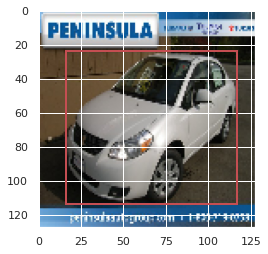

In [ ]:
# Lets validate data here 

#Get any record at random
eachRecord=trainDFUpdated.iloc[0,:]
im = img.imread(eachRecord['file_path'])  
resizedImage=cv2.resize(im, dsize=(images_height, images_width), interpolation=cv2.INTER_CUBIC)
#Some These images had 4 channels , needed below line to convert to 3 
#convertedImage=cv2.cvtColor(resizedImage, cv2.COLOR_BGRA2BGR)
im=resizedImage

# Show  image with Box
fig,ax = plt.subplots(1)
ax.imshow(im/255)
rect = patches.Rectangle((eachRecord['cor1'], eachRecord['cor2']), eachRecord['cor3'] - eachRecord['cor1'], eachRecord['cor4'] - eachRecord['cor2'], linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_df,valid_df= train_test_split(trainDFUpdated, test_size=0.20, random_state=0, stratify=train['label'])

In [ ]:
train_df.shape
valid_df.shape

(6515, 8)

(1629, 8)

In [ ]:
#STOP

In [ ]:
IMG_SIZE=128
BATCH_SIZE=32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

datagen =ImageDataGenerator(preprocessing_function=preprocess_input)
        


train_ds = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=train_data_dir,
        x_col="file_path",
        y_col=['cor1','cor2','cor3','cor4'],
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='raw',
        shuffle=True,
        seed=1
        )

val_ds = datagen.flow_from_dataframe(
        dataframe=valid_df,
        directory=train_data_dir,
        x_col="file_path",
        y_col=['cor1','cor2','cor3','cor4'],
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='raw',
        shuffle=True,
         seed=1
        )

Found 6515 validated image filenames.
Found 1629 validated image filenames.


In [ ]:
# Lts visualise data after it has been run through image generator

In [ ]:
(x,y)=train_ds.next()

In [ ]:
x.shape
y.shape

(32, 128, 128, 3)

(32, 4)

In [ ]:
x[0].shape

(128, 128, 3)

In [ ]:
y[0].shape

(4,)

In [ ]:
y[0]

array([ 23,  23, 113, 103])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


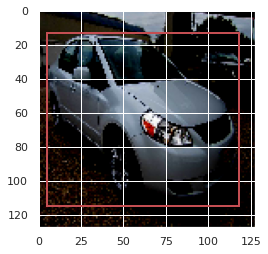

In [ ]:
# Lets visually display any two train data samples

# View any one sample of prepared Train Data (Ground Truth)
im=x[2]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im)
res_x0=y[2][0]
res_y0=y[2][1]
res_x1=y[2][2]
res_y1=y[2][3]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


In [ ]:
# Looks, ok, lets proceed

## 3.0 Model Building

In [ ]:
images_height=128
images_width=128

In [ ]:
# Lets build the model

from keras.applications.mobilenet import MobileNet
from keras.models import Model,load_model
from keras.layers import Conv2D, Reshape,Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ALPHA = 1.0

def create_model(trainable=True):
    regODModel = MobileNet(input_shape=(images_height, images_width, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in regODModel.layers:
        layer.trainable = trainable
    
    # Add new top layer for Regression Head
    boxPredicModel = regODModel.layers[-1].output
    boxPredicModel = Flatten()(boxPredicModel)
    boxPredicModel = Dense(units=4)(boxPredicModel) # These are the 4 predicted coordinates of one BBox
   
    return Model(inputs=regODModel.input, outputs=boxPredicModel,name="box_output")


In [ ]:
# Define evaluation metric

def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection
    # rk - again to repeat we know why he has minues , taken 2 times 

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)# rounded to 4 
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou
    # this is one number for the whole model

In [ ]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou
# This is a wrapper funcction

In [ ]:
#Initialize the model and print summary

model = create_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "box_output"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                 

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=IoU)

In [ ]:
#Training the model
#Fit the model to the dataset

#Use early stopping,fit the model,give train data - training features and labels,batch size: 32 contd...
#...epochs: 10,give validation data - testing features and labels

# Use earlystopping
callback = EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)
mc = ModelCheckpoint('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_128.h5', monitor='val_IoU', mode='max', verbose=1, save_best_only=True,save_weights_only=True)
# If val_iou does not increase by 001 in 5 epochs , stop
# Fit the model
model.fit(train_ds, validation_data=val_ds, epochs=10,callbacks=[callback,mc])
#Batch sizd ineffcetive here because already coming in batches of 32

Epoch 1/10
204/204 [==============================] - ETA: 0s - loss: 35.3404 - IoU: 0.8447
Epoch 1: val_IoU improved from -inf to 0.81883, saving model to /content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_128.h5
204/204 [==============================] - 68s 333ms/step - loss: 35.3404 - IoU: 0.8447 - val_loss: 2340.9558 - val_IoU: 0.8188
Epoch 2/10
204/204 [==============================] - ETA: 0s - loss: 24.6965 - IoU: 0.8670
Epoch 2: val_IoU improved from 0.81883 to 0.82192, saving model to /content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_128.h5
204/204 [==============================] - 68s 334ms/step - loss: 24.6965 - IoU: 0.8670 - val_loss: 2339.6147 - val_IoU: 0.8219
Epoch 3/10
204/204 [==============================] - ETA: 0s - loss: 18.7265 - IoU: 0.8839
Epoch 3: val_IoU did not improve from 0.82192
204/204 [==============================] - 68s 333ms/step - loss: 18.7265 - IoU: 0.8839 - val_loss: 2336.6489 - val_IoU: 0.8208
Epoch 4/10
20

In [ ]:
STOP

In [ ]:
#model.save_weights('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_128.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_128.h5')


In [ ]:
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=IoU)

In [ ]:
#model.load_weights('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_300.h5')

In [ ]:
#model.save('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_300.h5')
#model.save_weights('/content/drive/MyDrive/Capstone/Pickled_Info/RegODModel_bestWieghts_128.h5')

In [ ]:
#STOP

In [ ]:
#Final loss and accuracy
model.evaluate(val_ds)

51/51 [==============================] - 14s 267ms/step - loss: 2339.6143 - IoU: 0.8217


[2339.6142578125, 0.8216549158096313]

In [ ]:
x,y=val_ds.next()

In [ ]:
# Take some sample image and predict

region=model.predict(x[10].reshape(1,128,128,3)) # Predict the BBox
groundTruth=y[10]

In [ ]:
region
print('\n')
groundTruth

array([[ 12.715022,   8.994607, 110.746284, 125.48972 ]], dtype=float32)

array([  8,  10, 109, 123])

In [ ]:
################### Lets visually display ground Truth Vs Prediction ###################################################

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


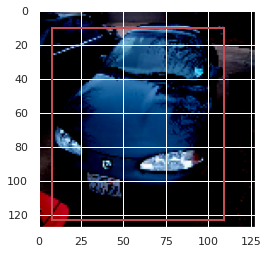

In [ ]:
# View any one sample of prepared Train Data /GroundTruth

im=x[10]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im)
res_x0=groundTruth[0]
res_y0=groundTruth[1]
res_x1=groundTruth[2]
res_y1=groundTruth[3]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


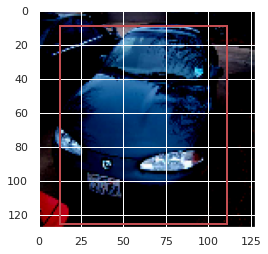

In [ ]:

# Lets view same sample PREDICTION

im=x[10]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im)
res_x0=region[0][0]
res_y0=region[0][1]
res_x1=region[0][2]
res_y1=region[0][3]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


In [ ]:
################################# Pickle Validation Data##################################################################

We will pickle Validation data set in a batch of 1600 for re-use in other notebooks

In [ ]:
IMG_SIZE=128
BATCH_SIZE=1600

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

datagen =ImageDataGenerator(preprocessing_function=preprocess_input)
        


train_ds = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=train_data_dir,
        x_col="file_path",
        y_col=['cor1','cor2','cor3','cor4'],
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='raw',
        shuffle=True,
        seed=1
        )

val_ds = datagen.flow_from_dataframe(
        dataframe=valid_df,
        directory=train_data_dir,
        x_col="file_path",
        y_col=['cor1','cor2','cor3','cor4'],
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='raw',
        shuffle=True,
         seed=1
        )

Found 6515 validated image filenames.
Found 1629 validated image filenames.


In [ ]:
(X_Batch,Y_Batch)=val_ds.next()

In [ ]:
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Batcht_RegIp.npy",X_Batch)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Batch_RegOp.npy",Y_Batch)

In [ ]:
X_Batch.shape
Y_Batch.shape

(1600, 128, 128, 3)

(1600, 4)